## Logistic Classification for IMDB : Keras

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

### Step 1. Data

In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

### Data processing, Training/Test Data

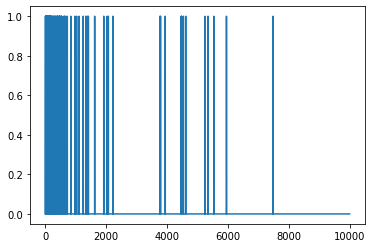

In [4]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

plt.plot(train_data[0])
plt.show()

### Step 2. Baseline Model 

In [5]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### Step 3. Loss,Optimizer, Metric for Baseline Model

In [6]:
baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

### Step 4. Train the model for Baseline Model

In [7]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.5082 - accuracy: 0.8070 - binary_crossentropy: 0.5082 - val_loss: 0.3595 - val_accuracy: 0.8712 - val_binary_crossentropy: 0.3595
Epoch 2/20
49/49 - 2s - loss: 0.2666 - accuracy: 0.9048 - binary_crossentropy: 0.2666 - val_loss: 0.2872 - val_accuracy: 0.8869 - val_binary_crossentropy: 0.2872
Epoch 3/20
49/49 - 2s - loss: 0.1935 - accuracy: 0.9309 - binary_crossentropy: 0.1935 - val_loss: 0.2902 - val_accuracy: 0.8838 - val_binary_crossentropy: 0.2902
Epoch 4/20
49/49 - 2s - loss: 0.1550 - accuracy: 0.9464 - binary_crossentropy: 0.1550 - val_loss: 0.3061 - val_accuracy: 0.8807 - val_binary_crossentropy: 0.3061
Epoch 5/20
49/49 - 2s - loss: 0.1265 - accuracy: 0.9589 - binary_crossentropy: 0.1265 - val_loss: 0.3335 - val_accuracy: 0.8749 - val_binary_crossentropy: 0.3335
Epoch 6/20
49/49 - 2s - loss: 0.1051 - accuracy: 0.9668 - binary_crossentropy: 0.1051 - val_loss: 0.3580 - val_accuracy: 0.8738 - val_binary_crossentropy: 0.3580
Epoch 7/20
49/49 - 2s - loss

### Step 2. Smaller Model 

In [8]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


### Step 3. Loss,Optimizer, Metric for Smaller Model

In [9]:
smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

### Step 4. Train the model for Smaller Model

In [10]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.5893 - accuracy: 0.7680 - binary_crossentropy: 0.5893 - val_loss: 0.4825 - val_accuracy: 0.8446 - val_binary_crossentropy: 0.4825
Epoch 2/20
49/49 - 2s - loss: 0.3721 - accuracy: 0.8794 - binary_crossentropy: 0.3721 - val_loss: 0.3423 - val_accuracy: 0.8760 - val_binary_crossentropy: 0.3423
Epoch 3/20
49/49 - 2s - loss: 0.2659 - accuracy: 0.9099 - binary_crossentropy: 0.2659 - val_loss: 0.2985 - val_accuracy: 0.8848 - val_binary_crossentropy: 0.2985
Epoch 4/20
49/49 - 2s - loss: 0.2165 - accuracy: 0.9272 - binary_crossentropy: 0.2165 - val_loss: 0.2848 - val_accuracy: 0.8887 - val_binary_crossentropy: 0.2848
Epoch 5/20
49/49 - 2s - loss: 0.1860 - accuracy: 0.9361 - binary_crossentropy: 0.1860 - val_loss: 0.2849 - val_accuracy: 0.8861 - val_binary_crossentropy: 0.2849
Epoch 6/20
49/49 - 2s - loss: 0.1625 - accuracy: 0.9458 - binary_crossentropy: 0.1625 - val_loss: 0.2866 - val_accuracy: 0.8861 - val_binary_crossentropy: 0.2866
Epoch 7/20
49/49 - 2s - loss

### Step 2. Bigger Model 

In [11]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


### Step 3. Loss,Optimizer, Metric for Bigger Model

In [12]:
bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

### Step 4. Train the model for Bigger Model

In [13]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 16s - loss: 0.3478 - accuracy: 0.8504 - binary_crossentropy: 0.3478 - val_loss: 0.2942 - val_accuracy: 0.8788 - val_binary_crossentropy: 0.2942
Epoch 2/20
49/49 - 15s - loss: 0.1448 - accuracy: 0.9494 - binary_crossentropy: 0.1448 - val_loss: 0.3278 - val_accuracy: 0.8728 - val_binary_crossentropy: 0.3278
Epoch 3/20
49/49 - 15s - loss: 0.0481 - accuracy: 0.9865 - binary_crossentropy: 0.0481 - val_loss: 0.4325 - val_accuracy: 0.8709 - val_binary_crossentropy: 0.4325
Epoch 4/20
49/49 - 15s - loss: 0.0070 - accuracy: 0.9990 - binary_crossentropy: 0.0070 - val_loss: 0.5663 - val_accuracy: 0.8682 - val_binary_crossentropy: 0.5663
Epoch 5/20
49/49 - 15s - loss: 8.5714e-04 - accuracy: 1.0000 - binary_crossentropy: 8.5714e-04 - val_loss: 0.6578 - val_accuracy: 0.8708 - val_binary_crossentropy: 0.6578
Epoch 6/20
49/49 - 15s - loss: 2.7007e-04 - accuracy: 1.0000 - binary_crossentropy: 2.7007e-04 - val_loss: 0.6987 - val_accuracy: 0.8708 - val_binary_crossentropy: 0.6987
Epoch 

### Plot the History

In [14]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

### Plot the Losses for 3 Models

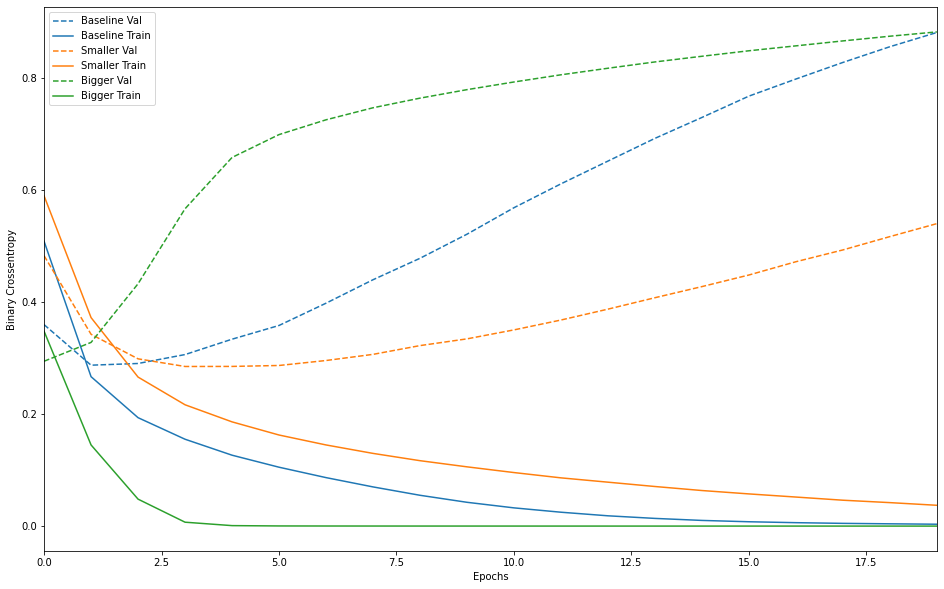

In [15]:
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

### Baseline Model with L2 Regulization

In [16]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


### Step 3. Loss,Optimizer, Metric for Baseline Model with  L2 Regulization

In [17]:
l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

### Step 4. Train the model for Baseline Model  with  L2 Regulization

In [18]:
l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.5199 - accuracy: 0.8097 - binary_crossentropy: 0.4781 - val_loss: 0.3799 - val_accuracy: 0.8752 - val_binary_crossentropy: 0.3343
Epoch 2/20
49/49 - 2s - loss: 0.3078 - accuracy: 0.9070 - binary_crossentropy: 0.2571 - val_loss: 0.3388 - val_accuracy: 0.8872 - val_binary_crossentropy: 0.2846
Epoch 3/20
49/49 - 2s - loss: 0.2597 - accuracy: 0.9278 - binary_crossentropy: 0.2031 - val_loss: 0.3413 - val_accuracy: 0.8853 - val_binary_crossentropy: 0.2830
Epoch 4/20
49/49 - 2s - loss: 0.2353 - accuracy: 0.9401 - binary_crossentropy: 0.1754 - val_loss: 0.3599 - val_accuracy: 0.8804 - val_binary_crossentropy: 0.2987
Epoch 5/20
49/49 - 2s - loss: 0.2222 - accuracy: 0.9444 - binary_crossentropy: 0.1599 - val_loss: 0.3693 - val_accuracy: 0.8784 - val_binary_crossentropy: 0.3058
Epoch 6/20
49/49 - 2s - loss: 0.2118 - accuracy: 0.9495 - binary_crossentropy: 0.1472 - val_loss: 0.3850 - val_accuracy: 0.8761 - val_binary_crossentropy: 0.3199
Epoch 7/20
49/49 - 2s - loss

### Plot the Losses for Baseline and L2 Regulization

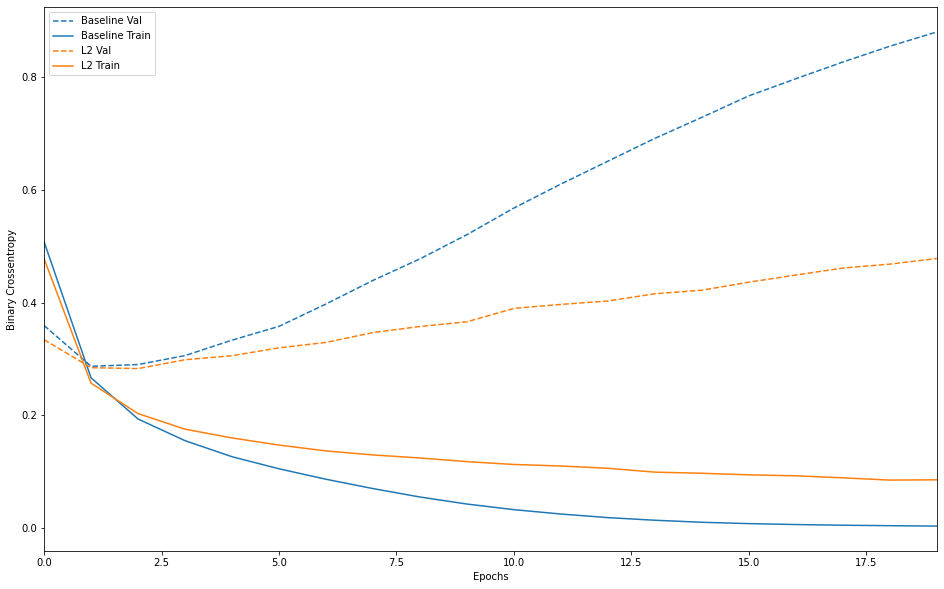

In [19]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

### Baseline Model with Dropout

In [20]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

### Step 3. Loss,Optimizer, Metric for Baseline Model with  Dropout

In [21]:
dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])


### Step 4. Train the model for Baseline Model  with  Dropout

In [22]:
dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.6205 - accuracy: 0.6521 - binary_crossentropy: 0.6205 - val_loss: 0.4534 - val_accuracy: 0.8533 - val_binary_crossentropy: 0.4534
Epoch 2/20
49/49 - 2s - loss: 0.4395 - accuracy: 0.8086 - binary_crossentropy: 0.4395 - val_loss: 0.3243 - val_accuracy: 0.8827 - val_binary_crossentropy: 0.3243
Epoch 3/20
49/49 - 2s - loss: 0.3443 - accuracy: 0.8641 - binary_crossentropy: 0.3443 - val_loss: 0.2798 - val_accuracy: 0.8900 - val_binary_crossentropy: 0.2798
Epoch 4/20
49/49 - 2s - loss: 0.2822 - accuracy: 0.8906 - binary_crossentropy: 0.2822 - val_loss: 0.2795 - val_accuracy: 0.8867 - val_binary_crossentropy: 0.2795
Epoch 5/20
49/49 - 2s - loss: 0.2461 - accuracy: 0.9061 - binary_crossentropy: 0.2461 - val_loss: 0.2761 - val_accuracy: 0.8866 - val_binary_crossentropy: 0.2761
Epoch 6/20
49/49 - 2s - loss: 0.2171 - accuracy: 0.9260 - binary_crossentropy: 0.2171 - val_loss: 0.2833 - val_accuracy: 0.8866 - val_binary_crossentropy: 0.2833
Epoch 7/20
49/49 - 2s - loss

### Plot the Losses for Baseline and Dropout

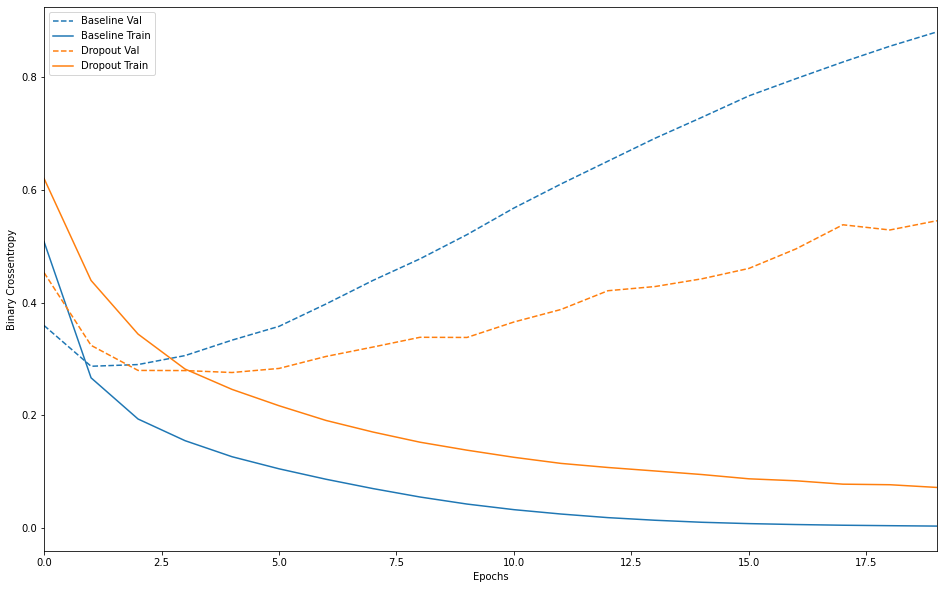

In [23]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])    
